<a href="https://colab.research.google.com/github/MrEgyptian/AI_Penis_Detector/blob/main/Penis_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1127]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

from tensorflow.keras.optimizers import Adam

# New Section

In [1128]:
#data=tf.keras.utils.image_dataset_from_directory(directory="train",
#    labels='inferred',
#    label_mode='int',
#    color_mode='rgb',
#    batch_size=32,
#    image_size=(480, 480),
#    shuffle=True,
#    seed=42,
#    validation_split=0.2,
#    subset='training',
#    interpolation='bilinear')

In [1129]:

#valid_data = tf.keras.utils.image_dataset_from_directory(
#    directory='train/',
#    labels='inferred',
#    label_mode='int',
#    color_mode='rgb',
#    batch_size=32,
#    image_size=(480, 480),
#    shuffle=True,
#    seed=42,
#    validation_split=0.2,
#    subset='validation',
#    interpolation='bilinear'
#)

In [1130]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


In [1131]:

data = train_datagen.flow_from_directory(
    'train/', target_size=(480, 480), batch_size=32, class_mode='binary'
)

Found 315 images belonging to 1 classes.


In [1132]:


valid_data = test_datagen.flow_from_directory(
    'test', target_size=(480, 480), batch_size=32, class_mode='binary'
)



Found 89 images belonging to 1 classes.


In [1133]:

# CNN model Thingy :)
model = models.Sequential()

model.add(layers.Rescaling(1./255, input_shape=(480, 480, 3)))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#model.add(layers.Rescaling(1./255, input_shape=(480, 480, 3)))
#model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
#model.add(layers.MaxPooling2D())
#model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(256, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Flatten())
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dense(20, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))

In [1134]:

# Compiling time yastaaaAAAAAAAAAAAAAA
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [1135]:

# Training model time 
epochs=12
acc=model.fit(
                data,
                epochs=epochs,
                steps_per_epoch=data.samples // 32,
                validation_data=valid_data,
                validation_steps=valid_data.samples // 32
             )


Epoch 1/12
9/9 [==============================] - 53s 6s/step - loss: 0.1510 - accuracy: 0.9859 - val_loss: 2.5012e-28 - val_accuracy: 1.0000
Epoch 2/12
9/9 [==============================] - 48s 5s/step - loss: 3.5718e-29 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/12
9/9 [==============================] - 47s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/12
9/9 [==============================] - 51s 6s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/12
9/9 [==============================] - 51s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/12
9/9 [==============================] - 46s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/12
9/9 [==============================] - 45s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val

In [1136]:
his=acc.history
his

{'loss': [0.15103840827941895,
  3.5718393045102895e-29,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'accuracy': [0.9858657121658325,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [2.5012329040186538e-28,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}

In [1322]:
acc = his['accuracy']
val_acc = his['val_accuracy']

loss = his['loss']
val_loss = his['val_loss']
epochs_range = range(epochs)


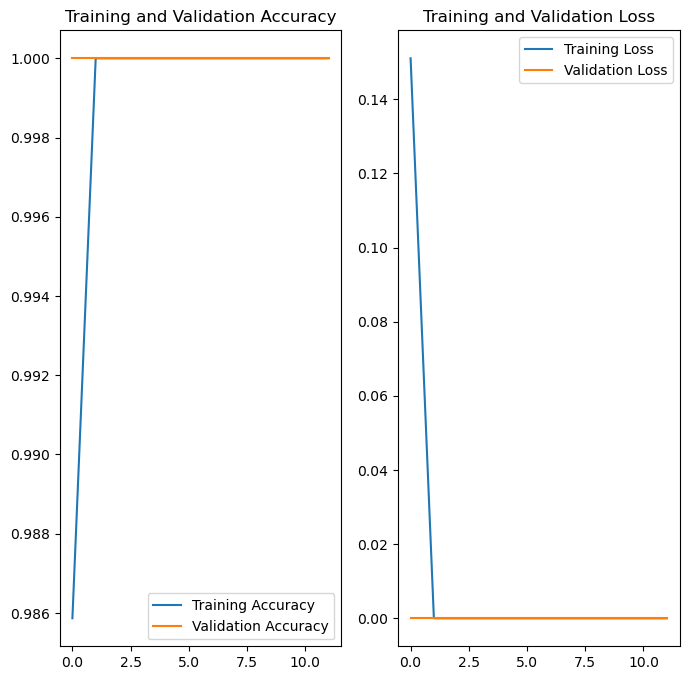

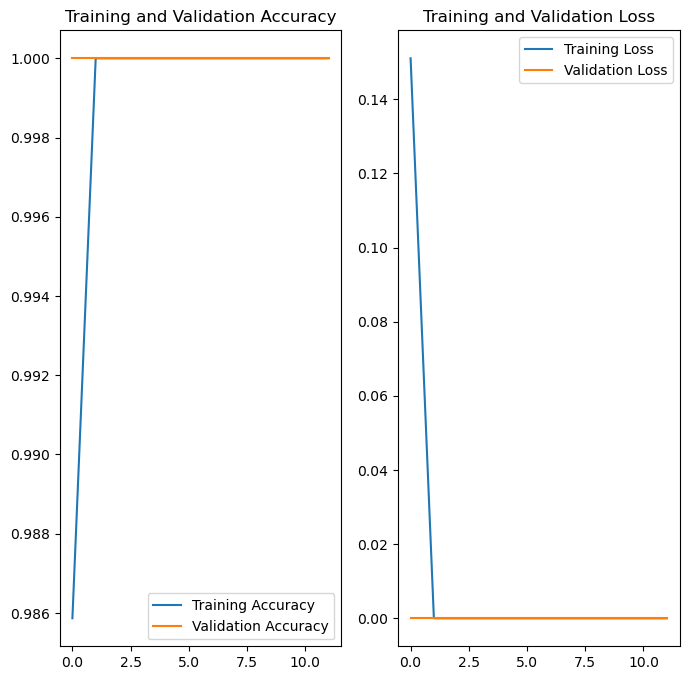

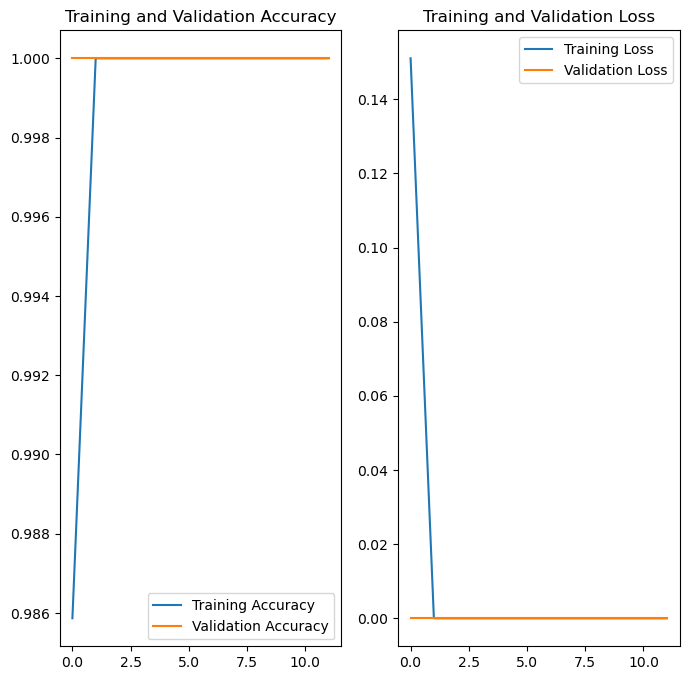

In [1323]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [1324]:
model.save('dick.keras')

In [1258]:
(test_loss, test_acc)=(his['loss'],his['accuracy'])
# Evaluate the model
test_loss, test_acc = model.evaluate(valid_data)
print(f'Test accuracy: {test_acc}')


3/3 [==============================] - 3s 862ms/step - loss: 0.9334 - accuracy: 0.0000e+00
Test accuracy: 0.0


In [1141]:
from PIL import Image

In [1219]:

def resize_image(input_path, output_path, size=(480, 480), format="JPEG"):
    try:
        # Open the image file
        with Image.open(input_path) as img:
            # Convert image mode to 'RGB' if it has an alpha channel
            if img.mode in ('RGBA', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
                img = img.convert('RGB')
            # Resize the image
            resized_img = img.resize(size)
            # Save the resized image
            resized_img.save(output_path, format=format)
            print(f"Image resized and saved to {output_path}")
            return resize_image
    except Exception as e:
        print(f"Error: {e}")

In [1220]:
img=resize_image('train/dicks/08z5ycr8ty4c1.jpg.jpg','penis.jpg')

Image resized and saved to penis.jpg


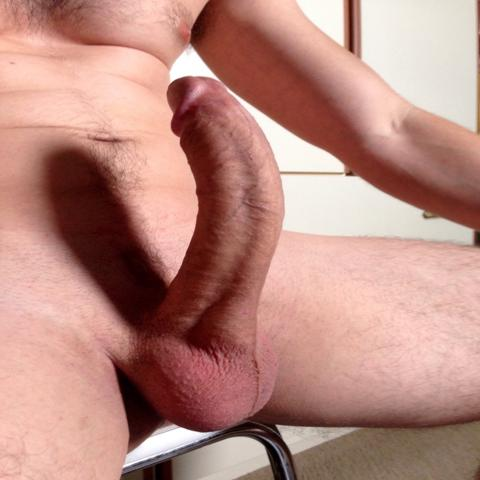

In [1325]:
img=tf.keras.utils.load_img('penis.jpg')
img

In [1326]:
arr=tf.keras.preprocessing.image.img_to_array(img)
arr.shape

(480, 480, 3)

In [1327]:
import numpy as np
img_array = np.expand_dims(arr, axis=0)  # Add batch dimension
img_array.shape

(1, 480, 480, 3)

In [1328]:
while z.history['loss'][0]>0.5:
 z=model.fit(img_array,np.array([1]))

In [1329]:
model.predict(img_array)


1/1 [==============================] - 0s 103ms/step


array([[0.60759026]], dtype=float32)

In [1295]:

img=resize_image('dick0.png','dick0.jpg')

Image resized and saved to dick0.jpg


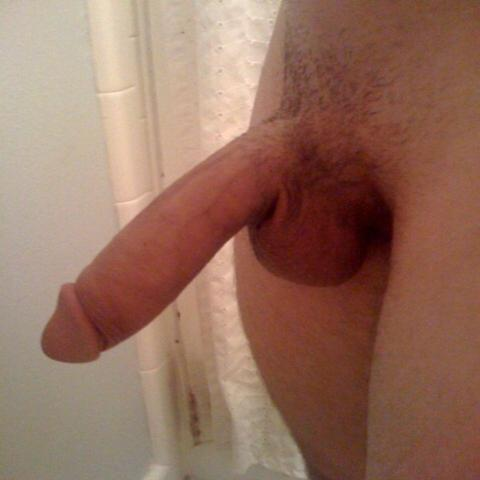

In [1296]:


img=tf.keras.utils.load_img('dick0.jpg')
img

In [1297]:
arr=tf.keras.preprocessing.image.img_to_array(img)
arr.shape


(480, 480, 3)

In [1298]:
img=resize_image('dick1.png','dick1.jpg')

Image resized and saved to dick1.jpg


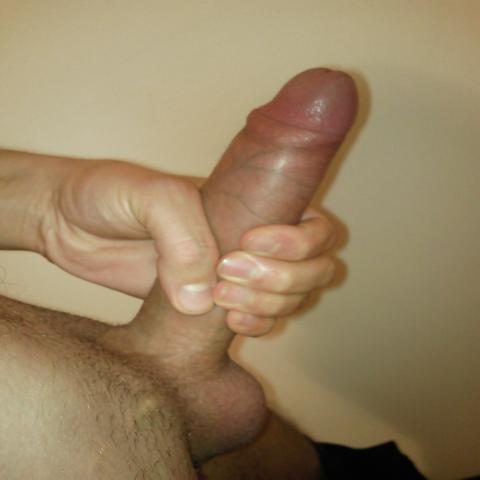

In [1299]:


img=tf.keras.utils.load_img('dick1.jpg')
img

In [1300]:
arr=tf.keras.preprocessing.image.img_to_array(img)

arr.shape

(480, 480, 3)

In [1301]:
import numpy as np
img_array = np.expand_dims(arr, axis=0)  # Add batch dimension
img_array.shape

(1, 480, 480, 3)

In [1302]:
model.predict([img_array]
             
             )

1/1 [==============================] - 0s 84ms/step


array([[0.60680276]], dtype=float32)

In [1303]:
img=resize_image('man.png','dick2.jpg')

Image resized and saved to dick2.jpg


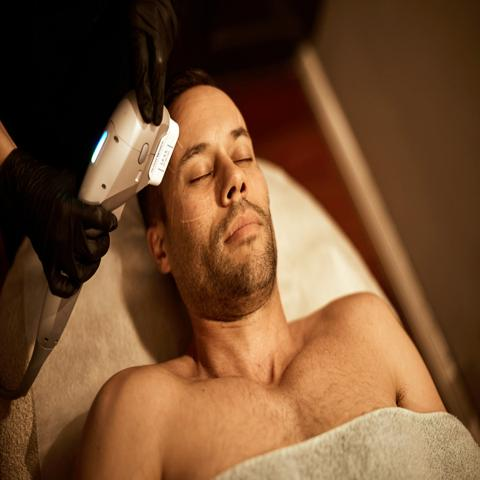

In [1304]:

img=tf.keras.utils.load_img('dick2.jpg')
img

In [1330]:
arr=tf.keras.preprocessing.image.img_to_array(img)
arr.shape

(480, 480, 3)

In [1331]:
import numpy as np
img_array = np.expand_dims(arr, axis=0)
# Add batch dimension [ - ] [ - ] [ - ] [ - ]
img_array.shape

(1, 480, 480, 3)

In [1332]:
while z.history['loss'][0]>0.5:
 z=model.fit(img_array,np.array([0]))


In [1333]:
model.predict(img_array)[0][0]



1/1 [==============================] - 0s 81ms/step


0.60759026

In [1309]:
img=resize_image('penis.png','penis.jpg')

Image resized and saved to penis.jpg


In [1310]:
img=resize_image('penis.png','penis.jpg')

Image resized and saved to penis.jpg


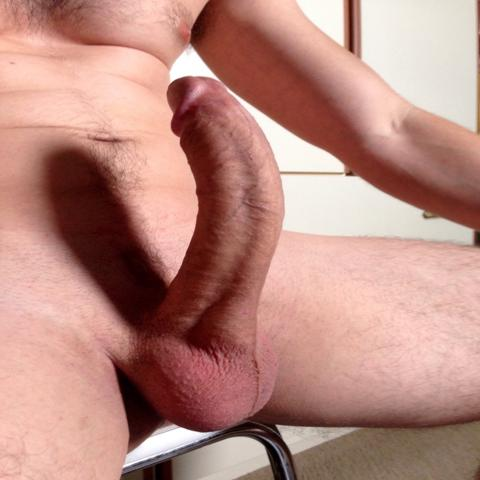

In [1334]:


img=tf.keras.utils.load_img('penis.jpg')
img


In [1335]:
arr=tf.keras.preprocessing.image.img_to_array(img)
arr.shape

(480, 480, 3)

In [1336]:
import numpy as np
img_array = np.expand_dims(arr, axis=0)  # Add batch dimension
img_array.shape

(1, 480, 480, 3)

In [1337]:
out=model.predict(tf.keras.utils.image_dataset_from_directory('test/',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(480, 480),
    shuffle=True,
    seed=42,
    interpolation='bilinear'))
(out[0]>0.5).astype(int)

Found 89 files belonging to 1 classes.
3/3 [==============================] - 4s 985ms/step


array([1])

In [1338]:
model.fit([img_array],np.array([1]))


1/1 [==============================] - 0s 403ms/step - loss: 0.4983 - accuracy: 1.0000


In [1339]:
model.predict(img_array)

1/1 [==============================] - 0s 91ms/step


array([[0.6077869]], dtype=float32)

In [1321]:
out[out.any()>=0.5]

array([[[0.60680276],
        [0.60680276],
        [0.60680276],
        [0.6068177 ],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60698944],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0.60680276],
        [0